In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from scipy.stats import boxcox
import warnings
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [28]:
pd.options.display.max_columns = 30

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

lifeexpectancy_df_Copy = lifeexpectancy_df.copy()

engine.dispose()

lifeexpectancy_df_Copy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Cleaning

In [3]:
lifeexpectancy_df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
lifeexpectancy_df_Copy.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [5]:
lifeexpectancy_df_Copy['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', "Côte d'Ivoire", 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Slovakia', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia

In [6]:
lifeexpectancy_df_Copy['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [29]:
columns_list = list(lifeexpectancy_df_Copy.columns)
del columns_list[:3]
for column in columns_list:
    for country in lifeexpectancy_df_Copy['Country'].unique():
        lifeexpectancy_df_Copy.loc[lifeexpectancy_df_Copy['Country'] == country, column] = lifeexpectancy_df_Copy.loc[lifeexpectancy_df_Copy['Country'] == country, column].interpolate()
        
columns_list = list(lifeexpectancy_df_Copy.columns)
del columns_list[:3]
for column in columns_list:
    for country in lifeexpectancy_df_Copy['Country'].unique():
        lifeexpectancy_df_Copy.loc[lifeexpectancy_df_Copy['Country'] == country, column] = lifeexpectancy_df_Copy.loc[lifeexpectancy_df_Copy['Country'] == country, column].fillna(lifeexpectancy_df_Copy.loc[lifeexpectancy_df_Copy['Country'] == country, column].mean())
        
lifeexpectancy_df_Copy.dropna(inplace = True)

The data was first interpolated by country. If this did not take care of all the missing values, then they were filled with the mean values from their country. Any missing values after this were dropped. This was done because if using these filling techniques based on the countries stastistics from other years were not available, then there is no way to tell what values would be appropriate. Therefore, to avoid faulty data, these values were dropped. 

In [30]:
lifeexpectancy_df_Copy = lifeexpectancy_df_Copy.reset_index(drop = True)
lifeexpectancy_df_Copy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,68.139709,174.300282,35.902726,4.436948,640.072009,74.270207,2657.467105,36.691964,49.817199,80.335996,5.888297,80.477444,2.173637,5404.256795,1.340066e+07,5.107895,5.177538,0.607481,11.691823
std,4.610856,9.610700,129.759274,136.224732,3.962833,1710.798798,28.796545,11912.236064,19.843731,185.152708,24.494233,2.256236,24.478990,5.827273,11375.423957,6.315714e+07,4.711951,4.805378,0.203404,3.203263
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,62.000000,76.000000,1.000000,0.827500,19.883256,64.000000,0.000000,18.400000,1.000000,74.000000,4.360000,76.000000,0.100000,395.535324,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,69.950000,152.000000,4.000000,3.735000,83.677991,87.000000,20.000000,38.850000,4.000000,91.000000,5.800000,91.000000,0.100000,1351.177885,1.433672e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,74.800000,241.250000,24.000000,7.162500,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.333000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000


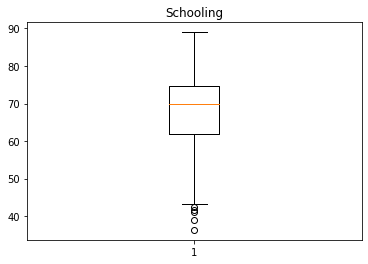

In [31]:
plt.boxplot(lifeexpectancy_df_Copy.iloc[:,3])
plt.title('Schooling')
plt.show()

In [32]:
col_list = lifeexpectancy_df_Copy.columns

In [11]:
lifeexpectancy_df_Copy.sort_values(col_list[21]).head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2015,Turkmenistan,2000,Developing,63.8,224.0,7,2.90,88.243635,96.0,113,37.5,9,98.0,3.94,97.0,0.1,643.175180,4516131.0,3.6,3.6,0.0,0.0
1919,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,79.0,0,11.9,4,38.0,3.26,54.0,0.1,422.286330,87167.0,12.2,12.2,0.0,0.0
255,Bosnia and Herzegovina,2000,Developing,74.6,116.0,0,3.64,165.616864,36.0,43,47.6,0,87.0,7.90,85.0,0.1,1461.755200,376676.0,3.3,3.2,0.0,0.0
1327,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,9.0,0,51.9,0,9.0,7.32,9.0,0.1,1627.428930,6495.0,2.6,2.7,0.0,0.0
1326,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,9.0,0,52.7,0,9.0,8.23,9.0,0.1,199.583957,67389.0,2.5,2.6,0.0,0.0


In [12]:
lifeexpectancy_df_Copy.sort_values(col_list[7]).head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2127,Zimbabwe,2000,Developing,46.0,665.0,24,1.680000,0.0,79.0,1483,25.5,39,78.0,7.100000,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8
1857,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.010000,0.0,47.0,594,56.2,8,52.0,3.250000,43.0,0.1,1087.435774,19239.0,6.3,6.1,0.575,9.0
240,Bosnia and Herzegovina,2015,Developing,77.4,88.0,0,4.405333,0.0,82.0,1677,55.8,0,74.0,8.742000,82.0,0.1,4574.978700,3535961.0,2.3,2.3,0.747,14.2
1856,Syrian Arab Republic,2015,Developing,64.5,293.0,6,0.804667,0.0,41.0,45,57.1,8,5.0,3.946667,41.0,0.1,1087.435774,18734987.0,6.3,6.1,0.553,9.0
1840,Sweden,2015,Developed,82.4,53.0,0,6.926667,0.0,67.0,22,59.5,0,98.0,9.932667,98.0,0.1,5585.258470,9799186.0,1.5,1.4,0.909,15.9


Most of the variables have a significant amount of outliers and are skewed in some way. A handful of them have nonsensical values such as extremely low/high values or 0's in categories that should not have 0's in them(as shown above). This is either due to misreporting or input errors. These values will be dealt with using various techniques to avoid them harming the integrity of the analysis.

In [33]:
num_list = [4,8,12,14]
for num in num_list:
    for row in lifeexpectancy_df_Copy.index:
        if lifeexpectancy_df_Copy.iloc[row,num] == 9:
            lifeexpectancy_df_Copy.iloc[row,num] = 90
        if lifeexpectancy_df_Copy.iloc[row,num] == 8:
            lifeexpectancy_df_Copy.iloc[row,num] = 80
        if lifeexpectancy_df_Copy.iloc[row,num] == 7:
            lifeexpectancy_df_Copy.iloc[row,num] = 70
        if lifeexpectancy_df_Copy.iloc[row,num] == 6:
            lifeexpectancy_df_Copy.iloc[row,num] = 60
        if lifeexpectancy_df_Copy.iloc[row,num] == 5:
            lifeexpectancy_df_Copy.iloc[row,num] = 50
        if lifeexpectancy_df_Copy.iloc[row,num] == 4:
            lifeexpectancy_df_Copy.iloc[row,num] = 40
        if lifeexpectancy_df_Copy.iloc[row,num] == 3:
            lifeexpectancy_df_Copy.iloc[row,num] = 30
        if lifeexpectancy_df_Copy.iloc[row,num] == 2:
            lifeexpectancy_df_Copy.iloc[row,num] = 20
        if lifeexpectancy_df_Copy.iloc[row,num] == 1:
            lifeexpectancy_df_Copy.iloc[row,num] = 10

For these values, when an multiple of ten is reached, one of the zeros are dropped making it a single digit. This is fixed with the code above. 

## Feature Engineering

In [14]:
lifeexpectancy_df_Copy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,68.139709,175.594455,35.902726,4.436948,640.072009,79.950188,2657.467105,36.691964,49.817199,85.119361,5.888297,84.901316,2.173637,5404.256795,1.340066e+07,5.107895,5.177538,0.607481,11.691823
std,4.610856,9.610700,128.372773,136.224732,3.962833,1710.798798,20.754081,11912.236064,19.843731,185.152708,15.275648,2.256236,15.933000,5.827273,11375.423957,6.315714e+07,4.711951,4.805378,0.203404,3.203263
min,2000.000000,36.300000,10.000000,0.000000,0.010000,0.000000,11.000000,0.000000,1.400000,0.000000,17.000000,0.370000,16.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,62.000000,77.000000,1.000000,0.827500,19.883256,72.000000,0.000000,18.400000,1.000000,78.000000,4.360000,79.000000,0.100000,395.535324,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,69.950000,152.000000,4.000000,3.735000,83.677991,88.000000,20.000000,38.850000,4.000000,91.000000,5.800000,91.000000,0.100000,1351.177885,1.433672e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,74.800000,241.250000,24.000000,7.162500,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.333000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000


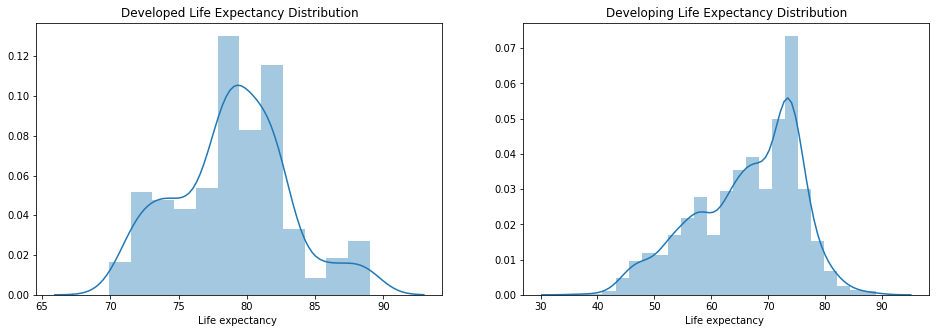

Status
Developed     78.906579
Developing    66.345230
Name: Life expectancy , dtype: float64

In [34]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.distplot(lifeexpectancy_df_Copy[lifeexpectancy_df_Copy['Status'] == 'Developed']['Life expectancy '])
plt.title('Developed Life Expectancy Distribution')
plt.subplot(1,2,2)
sns.distplot(lifeexpectancy_df_Copy[lifeexpectancy_df_Copy['Status'] == 'Developing']['Life expectancy '])
plt.title('Developing Life Expectancy Distribution')

plt.show()

lifeexpectancy_df_Copy.groupby('Status')['Life expectancy '].mean()

In [35]:
stats.ttest_ind(lifeexpectancy_df_Copy[lifeexpectancy_df_Copy['Status'] == 'Developed']['Life expectancy '],lifeexpectancy_df_Copy[lifeexpectancy_df_Copy['Status'] == 'Developing']['Life expectancy '])

Ttest_indResult(statistic=23.720859135898525, pvalue=1.502407862645548e-110)

Here I tested to see if the developed and developing country's life expectancies were we significantly different. With an extreme p-value, this proves that they are and so dummy variables will be used to convert them into a numerical variable below. 

In [36]:
dev = pd.get_dummies(lifeexpectancy_df_Copy['Status'],drop_first=True)
dev_df = pd.DataFrame(dev, columns = ['Developing'])
lifeexpectancy_df_Copy = pd.concat([lifeexpectancy_df_Copy,dev_df],axis = 1)

In [37]:
lifeexpectancy_df_corr = lifeexpectancy_df_Copy.corr()
lifeexpectancy_df_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
Year,1.000000e+00,0.177657,-0.075063,-0.041393,-0.045397,0.038502,0.268604,-0.097629,0.105160,-0.046959,0.140682,0.059385,0.150960,-0.155673,0.108519,0.016398,-0.050736,-0.055568,0.247605,0.225527,-3.234309e-19
Life expectancy,1.776570e-01,1.000000,-0.662073,-0.162808,0.395786,0.395555,0.319996,-0.135319,0.594391,-0.189417,0.593201,0.203663,0.592984,-0.572137,0.445304,-0.011420,-0.458721,-0.450215,0.734244,0.746619,-4.574682e-01
Adult Mortality,-7.506300e-02,-0.662073,1.000000,0.041674,-0.176598,-0.222221,-0.148203,-0.005861,-0.366737,0.056532,-0.283005,-0.095856,-0.270800,0.538484,-0.248098,-0.021613,0.274499,0.279900,-0.414820,-0.405053,2.779409e-01
infant deaths,-4.139348e-02,-0.162808,0.041674,1.000000,-0.103072,-0.085955,-0.190343,0.520328,-0.225732,0.996602,-0.240294,-0.148684,-0.243240,0.003869,-0.097853,0.555949,0.483646,0.489440,-0.139262,-0.194936,1.053237e-01
Alcohol,-4.539691e-02,0.395786,-0.176598,-0.103072,1.000000,0.417455,0.094772,-0.030693,0.375730,-0.098163,0.277814,0.237557,0.271002,-0.032668,0.459943,-0.023627,-0.401601,-0.390666,0.534289,0.591578,-6.116445e-01
percentage expenditure,3.850240e-02,0.395555,-0.222221,-0.085955,0.417455,1.000000,-0.050498,-0.065444,0.260670,-0.088478,0.190227,0.214022,0.190385,-0.102166,0.934256,-0.015322,-0.258344,-0.258194,0.390096,0.405435,-4.833693e-01
Hepatitis B,2.686040e-01,0.319996,-0.148203,-0.190343,0.094772,-0.050498,1.000000,-0.166975,0.225877,-0.208347,0.633294,0.136882,0.651014,-0.123894,-0.014746,-0.046929,-0.163707,-0.171427,0.273240,0.308102,-9.560307e-02
Measles,-9.762936e-02,-0.135319,-0.005861,0.520328,-0.030693,-0.065444,-0.166975,1.000000,-0.165920,0.527674,-0.193507,-0.111240,-0.199319,0.020215,-0.073311,0.266169,0.234345,0.229632,-0.135472,-0.142565,7.735856e-02
BMI,1.051596e-01,0.594391,-0.366737,-0.225732,0.375730,0.260670,0.225877,-0.165920,1.000000,-0.235991,0.354235,0.235368,0.356726,-0.236691,0.304319,-0.067975,-0.555157,-0.562781,0.542882,0.585756,-3.387682e-01
under-five deaths,-4.695909e-02,-0.189417,0.056532,0.996602,-0.098163,-0.088478,-0.208347,0.527674,-0.235991,1.000000,-0.266592,-0.148932,-0.271738,0.015733,-0.101501,0.543567,0.485134,0.489724,-0.159229,-0.211838,1.077652e-01


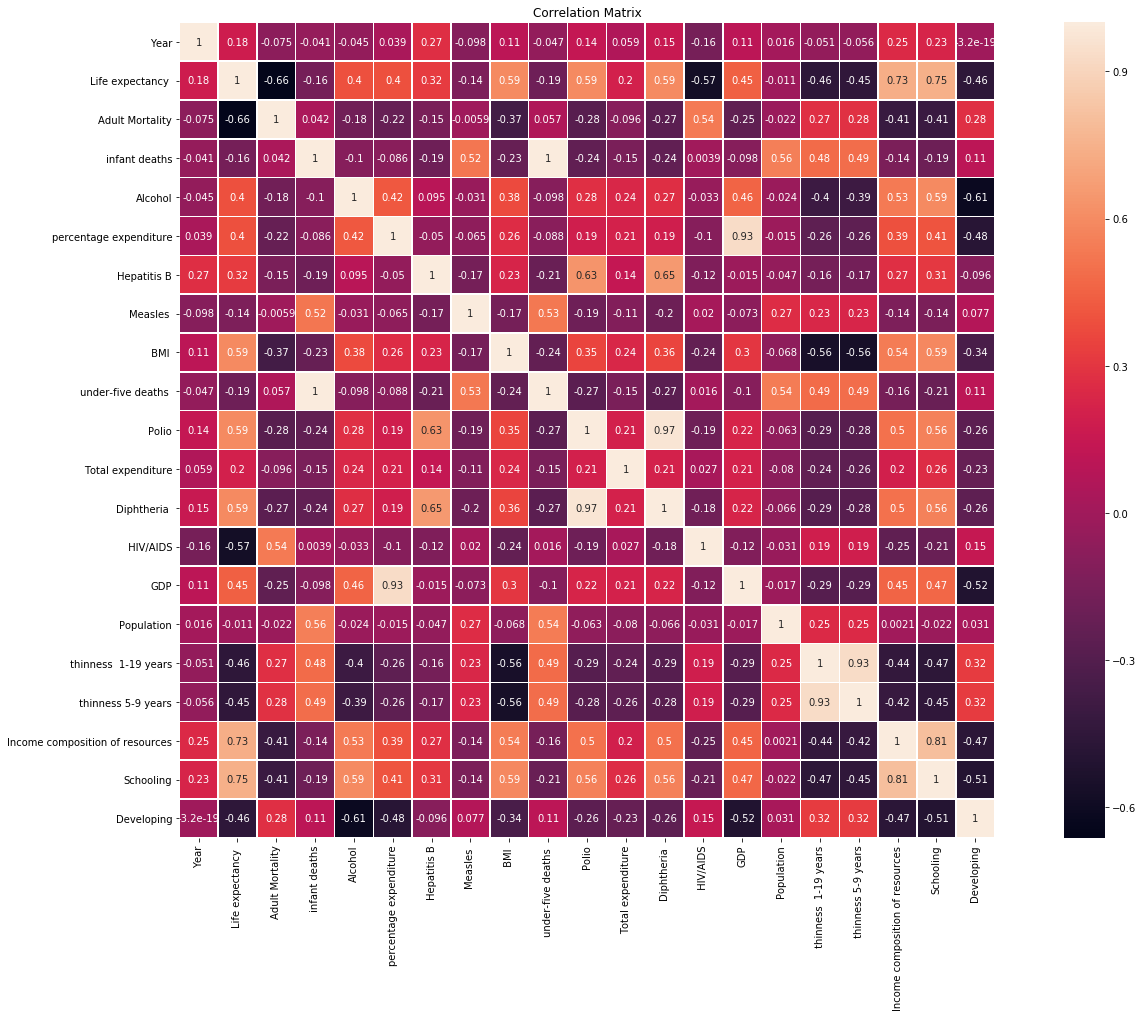

In [38]:
plt.figure(figsize=(25,15))
sns.heatmap(lifeexpectancy_df_corr, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

The correlation factors between each variable were calculated and displayed through this heatmap. Some variables have a high correlation with other variables (>70%). To keep stability, some of the variables were dropped.

In [39]:
lifeexpectancy_df_prep = lifeexpectancy_df_Copy.copy()

LifeE_BC = boxcox(lifeexpectancy_df_prep['Life expectancy '])[0]
AdultM_BC = boxcox(lifeexpectancy_df_prep['Adult Mortality'])[0]
Alcohol_BC = boxcox(lifeexpectancy_df_prep['Alcohol'])[0]
HepB_BC = boxcox(lifeexpectancy_df_prep['Hepatitis B'])[0]
lifeexpectancy_df_prep.loc[:, 'Measles '] +=1
Measles_BC  = boxcox(lifeexpectancy_df_prep['Measles '])[0]
BMI_BC = boxcox(lifeexpectancy_df_prep[' BMI '])[0]
lifeexpectancy_df_prep.loc[:, 'under-five deaths '] +=1
Under5_BC = boxcox(lifeexpectancy_df_prep['under-five deaths '])[0]
Polio_BC = boxcox(lifeexpectancy_df_prep['Polio'])[0]
TotalE_BC = boxcox(lifeexpectancy_df_prep['Total expenditure'])[0]
HIVAIDS_BC = boxcox(lifeexpectancy_df_prep[' HIV/AIDS'])[0]
GDP_BC = boxcox(lifeexpectancy_df_prep['GDP'])[0]
Population_BC = boxcox(lifeexpectancy_df_prep['Population'])[0]
Thin119_BC = boxcox(lifeexpectancy_df_prep[' thinness  1-19 years'])[0]
lifeexpectancy_df_prep.loc[:, 'Schooling'] +=1
Schooling_BC = boxcox(lifeexpectancy_df_prep['Schooling'])[0]
lifeexpectancy_df_prep.loc[:, 'Developing'] +=1
Dev_BC = boxcox(lifeexpectancy_df_prep['Developing'])[0]

Using the Box-Cox transformation, the distributions were transformed to become more normal.

In [89]:
LifeE_NS = normalize(np.array(LifeE_BC).reshape(1,-1)).reshape(-1,1)
AdultM_NS = normalize(np.array(AdultM_BC).reshape(1,-1)).reshape(-1,1)
Alcohol_NS = normalize(np.array(Alcohol_BC).reshape(1,-1)).reshape(-1,1)
HepB_NS = normalize(np.array(HepB_BC).reshape(1,-1)).reshape(-1,1)
Measles_NS = normalize(np.array(Measles_BC).reshape(1,-1)).reshape(-1,1)
BMI_NS = normalize(np.array(BMI_BC).reshape(1,-1)).reshape(-1,1)
Under5_NS = normalize(np.array(Under5_BC).reshape(1,-1)).reshape(-1,1)
Polio_NS = normalize(np.array(Polio_BC).reshape(1,-1)).reshape(-1,1)
TotalE_NS = normalize(np.array(TotalE_BC).reshape(1,-1)).reshape(-1,1)
HIVAIDS_NS = normalize(np.array(HIVAIDS_BC).reshape(1,-1)).reshape(-1,1)
GDP_NS = normalize(np.array(GDP_BC).reshape(1,-1)).reshape(-1,1)
Population_NS = normalize(np.array(Population_BC).reshape(1,-1)).reshape(-1,1)
Thin119_NS = normalize(np.array(Thin119_BC).reshape(1,-1)).reshape(-1,1)
Schooling_NS = normalize(np.array(Schooling_BC).reshape(1,-1)).reshape(-1,1)
Dev_NS = normalize(np.array(Dev_BC).reshape(1,-1)).reshape(-1,1)

LifeE_NS = scale(LifeE_NS).flatten()
AdultM_NS = scale(AdultM_NS).flatten()
Alcohol_NS = scale(Alcohol_NS).flatten()
HepB_NS = scale(HepB_NS).flatten()
Measles_NS = scale(Measles_NS).flatten()
BMI_NS = scale(BMI_NS).flatten()
Under5_NS = scale(Under5_NS).flatten()
Polio_NS = scale(Polio_NS).flatten()
TotalE_NS = scale(TotalE_NS).flatten()
HIVAIDS_NS = scale(HIVAIDS_NS).flatten()
GDP_NS = scale(GDP_NS).flatten()
Population_NS = scale(Population_NS).flatten()
Thin119_NS = scale(Thin119_NS).flatten()
Schooling_NS = scale(Schooling_NS).flatten()
Dev_NS = scale(Dev_NS).flatten()

The data has now been normalized and scaled. This prepares it to go through the Principle Components Analysis process. This will reduce the amount of variables even further into components that represent most of the information from the original 15 variables.

## PCA

In [91]:
df_list = [(LifeE_NS), (AdultM_NS), (Alcohol_NS), (HepB_NS), (Measles_NS), (BMI_NS), (Under5_NS), (Polio_NS), (TotalE_NS), (HIVAIDS_NS), (GDP_NS), (Population_NS), (Thin119_NS), (Schooling_NS), (Dev_NS) ]
columns_list = ['Life Exp','Adult Mor','Alcohol','HepB','Measles','BMI','Under5','Polio','TotalE','HIVAIDS','GDP','Pop','Thin 1-19','Schooling','Developing']
lifeexpectancy_df_ns = pd.DataFrame(df_list, index = columns_list)
lifeexpectancy_df_ns = lifeexpectancy_df_ns.T

,Life Exp,Adult Mor,Alcohol,HepB,Measles,BMI,Under5,Polio,TotalE,HIVAIDS,GDP,Pop,Thin 1-19,Schooling,Developing
0,-0.438158,0.808325,-1.797877,-1.082946,1.108666,-0.836040,1.276470,-1.642531,1.001912,-0.854362,-0.477435,1.385297,1.827818,-0.548352,0.408248
1,-0.924696,0.854497,-1.797877,-1.205369,0.913504,-0.864260,1.289968,-1.693415,1.010079,-0.854362,-0.451500,-0.547213,1.851294,-0.578746,0.408248
2,-0.924696,0.837282,-1.797877,-1.125002,0.881117,-0.892659,1.302926,-1.585693,0.989653,-0.854362,-0.434775,1.355376,1.866766,-0.609035,0.408248
3,-0.960362,0.860209,-1.797877,-0.994999,1.293609,-0.921244,1.319431,-1.414419,1.148287,-0.854362,-0.402653,0.383866,1.882097,-0.639220,0.408248
4,-0.986878,0.877268,-1.797877,-0.949072,1.309181,-0.944249,1.335125,-1.374657,0.883004,-0.854362,-1.652355,0.294193,1.904839,-0.729141,0.408248
5,-1.021920,0.899838,-1.797877,-1.039618,1.224797,-0.973184,1.353710,-1.452258,1.421272,-0.854362,-0.507078,0.280797,1.919833,-0.818098,0.408248
6,-1.039308,0.911048,-1.797877,-1.165803,1.298856,-1.002324,1.367826,-1.554896,1.508666,-0.854362,-0.624301,-0.596810,1.934696,-0.906073,0.408248
7,-1.082391,0.944387,-1.671707,-1.125002,1.179006,-1.031676,1.381332,-1.522432,1.071200,-0.854362,-0.720200,0.258324,1.949432,-0.964169,0.408248
8,-1.133363,0.988179,-1.724319,-1.165803,1.106181,-1.061249,1.391089,-1.554896,0.406130,-0.854362,-0.725312,1.270249,1.964043,-1.050467,0.408248
9,-1.150178,0.988179,-1.671707,-1.125002,1.224902,-1.091052,1.400547,-1.693415,0.700802,-0.854362,-0.889067,0.236798,1.978530,-1.135732,0.408248


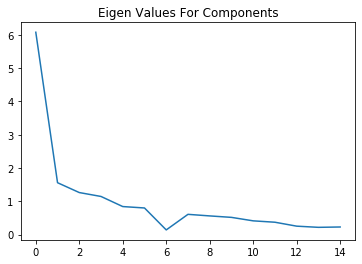

[6.07807071 1.55916723 1.26333306 1.14594979 0.84272335 0.80027904
 0.14122747 0.60898502 0.56178471 0.51802371 0.41356158 0.37218206
 0.25397572 0.21875144 0.22903729]


In [143]:
X = StandardScaler().fit_transform(lifeexpectancy_df_ns)
Xt = X.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.title('Eigen Values For Components')
plt.show()

print(eig_val_cov)

To inspect how many components to keep, the eigen values are displayed. The first four will be the components used since they have a value over one.

In [98]:
sklearn_pca = PCA(n_components=4)
pca_array = sklearn_pca.fit_transform(X)

In [100]:
sklearn_pca.explained_variance_ratio_

array([0.4050143 , 0.10389564, 0.08418263, 0.07636075])

The first component explains 40.5% of the variance with the next three explaining 10.4%, 8.4%, and 7.6% respectively. 

In [107]:
pc_1 = []
pc_2 = []
pc_3 = []
pc_4 = []
i = 0
while i < len(pca_array):
    pc_1.append(pca_array[i][0])
    i +=1
    
i = 0
while i < len(pca_array):
    pc_2.append(pca_array[i][1])
    i +=1
    
i = 0
while i < len(pca_array):
    pc_3.append(pca_array[i][2])
    i +=1
    
i = 0
while i < len(pca_array):
    pc_4.append(pca_array[i][3])
    i +=1

In [112]:
lifeexpectancy_df_Copy['Principal Component 1'] = pc_1
lifeexpectancy_df_Copy['Principal Component 2'] = pc_2
lifeexpectancy_df_Copy['Principal Component 3'] = pc_3
lifeexpectancy_df_Copy['Principal Component 4'] = pc_4

The components are then added to the the data frame so that it can be used to check its correlation with every other variable/component.

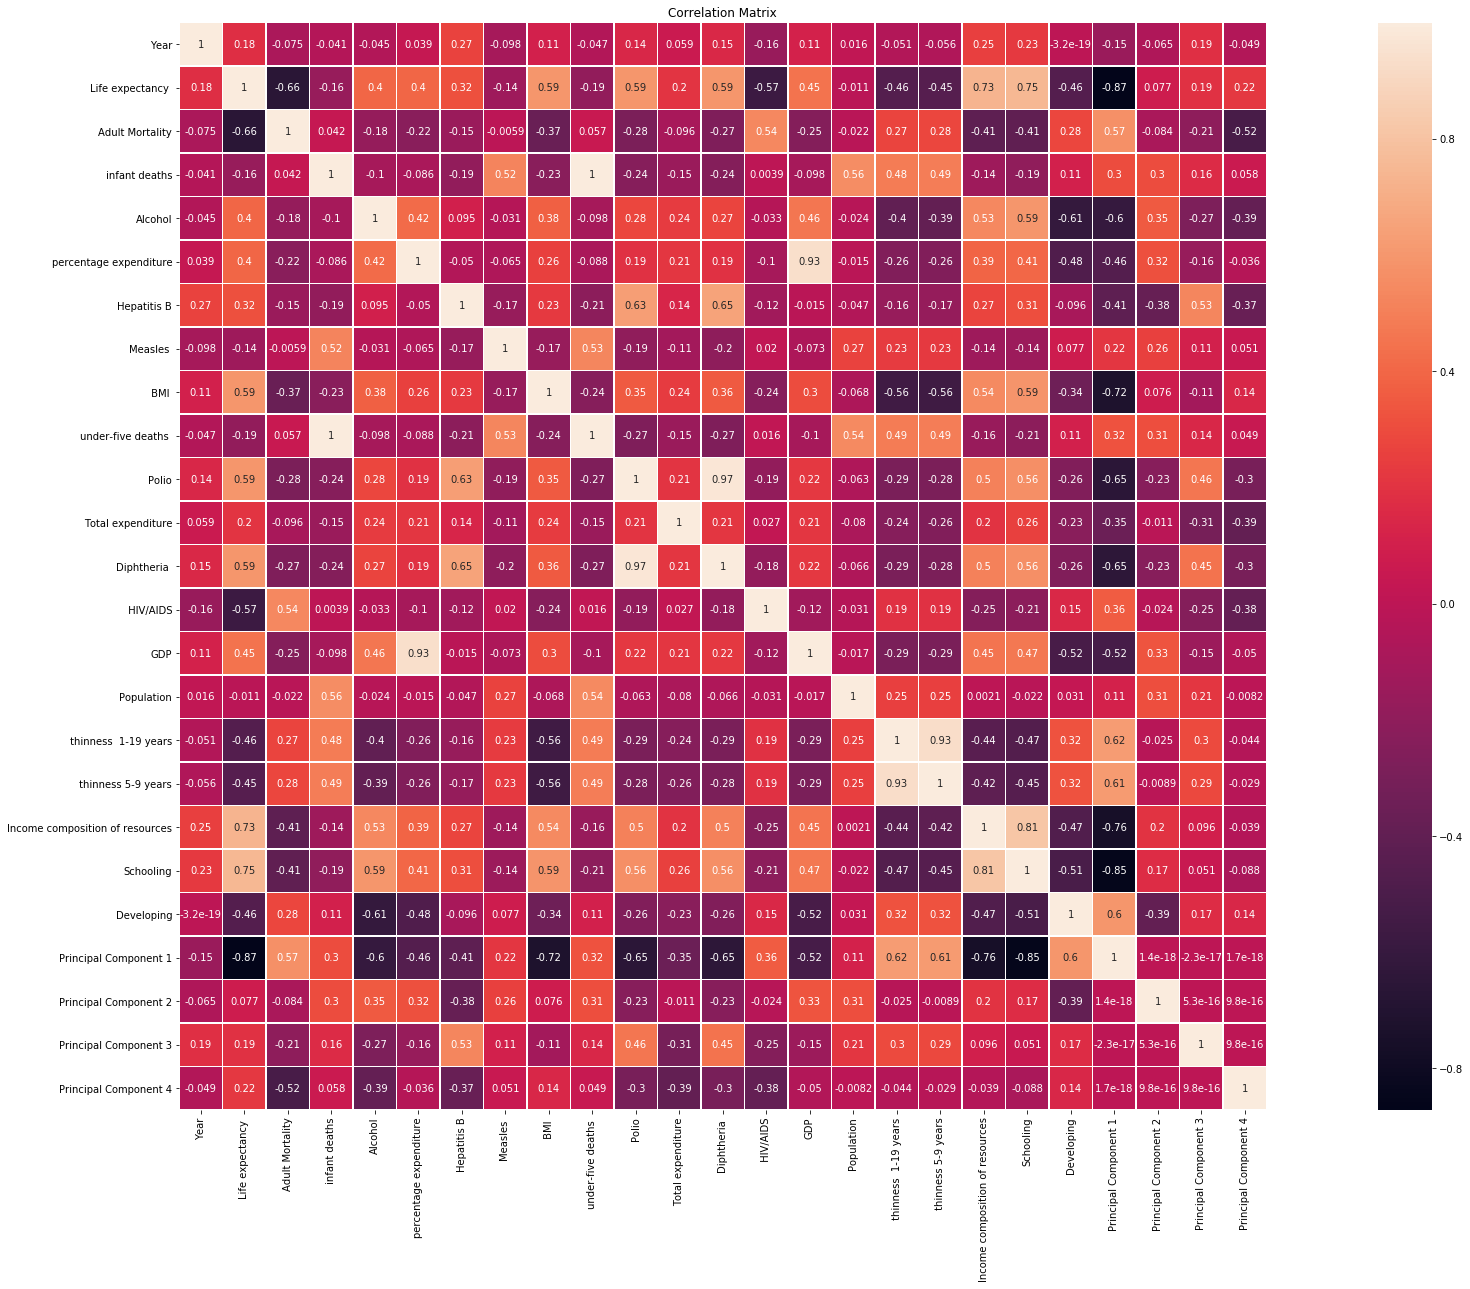

In [116]:
plt.figure(figsize=(40,20))
sns.heatmap(lifeexpectancy_df_Copy.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [126]:
corr_list_index = list(lifeexpectancy_df_Copy.corr().iloc[:,1].abs().sort_values(ascending = False).index)
corr_list_val = list(lifeexpectancy_df_Copy.corr().iloc[:,1].abs().sort_values(ascending = False))

## Summary

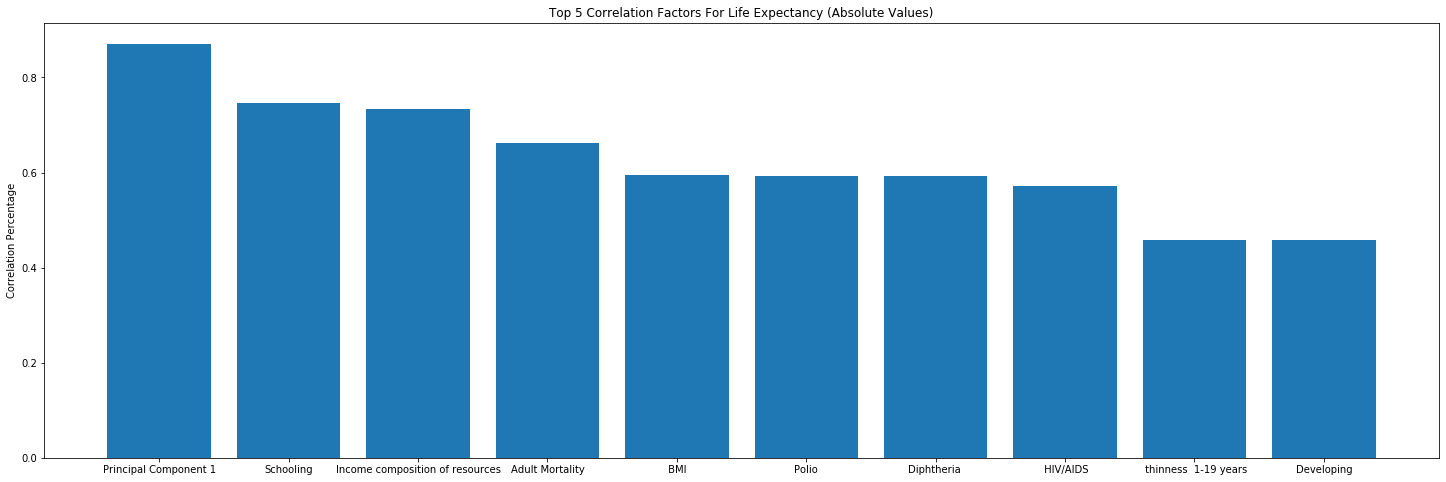

In [142]:
plt.figure(figsize = (25,8))
plt.bar(x = corr_list_index[1:11] ,height = corr_list_val[1:11])
plt.title('Top 5 Correlation Factors For Life Expectancy (Absolute Values)')
plt.ylabel('Correlation Percentage')
plt.show()

The graph above shows the top 10 correlation factors after PCA. As you can see, the first principal component has the highest correlation with life expectancy (87%). The other components did not perform as well as the first one, having a correlation to life expectancy of 22% and below. Depending on the model, the number of components and variables to use may vary. No matter the number of inputs for the model, the most important feature is the first principal component created. Discarding school, income composition of resources, and BMI could be done to reduce the number of features since they are highly correlated (>75%) with PC1.